## Принятие решений в бизнесе на основе данных

Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.
Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать разультаты.

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


**Часть 2. Анализ A/B-теста**

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача:**

- Проанализировать A/B-тест:


- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.


- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.


- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.


- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.


- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.


- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.


- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.


- Построить точечный график стоимостей заказов. Сделать выводы и предположения.


- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.


- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.


- Принять решение по результатам теста и объяснить его. 


**Варианты решений:** 


1. Остановить тест, зафиксировать победу одной из групп. 


2. Остановить тест, зафиксировать отсутствие различий между группами.


3. Продолжить тест.

## Часть №1. Приоритизация гипотез

###  Изучение общей информации о данных для части 1 (Приоритизация гипотез) и предобработка данных

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
#from scipy import stats as st

In [2]:
# Импортируем данные 
hypothesis = pd.read_csv('hypothesis.csv')
# установим отображение количества столбцов на экране
pd.options.display.max_columns = 40

**Информация о датасете hypothesis:**


- Hypothesis — краткое описание гипотезы;


- Reach — охват пользователей по 10-балльной шкале;


- Impact — влияние на пользователей по 10-балльной шкале;


- Confidence — уверенность в гипотезе по 10-балльной шкале;


- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
# Посмотрим на общую информацию о датасете и сам датасет
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 388.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Отлично, пропусков в данных нет, однако нужно заменить типы данных на более подходящие:

In [5]:
# Для проверки мин. и макс. зн-я, подходящего для хранения с использованием каждого целочисленного подтипа, можно воспользоваться методом numpy.iinfo()
int_types = ["int8", "int16", "int32","int64","uint8", "uint16", "uint32","uint64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

In [6]:
hypothesis['Reach'] = hypothesis['Reach'].astype('uint8')
hypothesis['Impact'] = hypothesis['Impact'].astype('uint8')
hypothesis['Confidence'] = hypothesis['Confidence'].astype('uint8')
hypothesis['Efforts'] = hypothesis['Efforts'].astype('uint8')

In [7]:
# Проверим замену
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      uint8 
 2   Impact      9 non-null      uint8 
 3   Confidence  9 non-null      uint8 
 4   Efforts     9 non-null      uint8 
dtypes: object(1), uint8(4)
memory usage: 136.0+ bytes


In [8]:
# Для удобства приведем названия столбцов к нижнему регистру
hypothesis.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [9]:
# Подготовим список new_names с новыми именами для столбцов
new_names = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [10]:
# Переименуем столбцы таблицы, которая хранится в переменной hypothesis
hypothesis.set_axis(new_names, axis = 'columns', inplace = True)

In [11]:
#Проверим замену
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Дубликатов также в таком маленьком наборе данных нет. Теперь можем переходить к расчету показателей:

### Применение фреймворка ICE для приоритизации гипотез

In [12]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
barh_ice = hypothesis[['hypothesis','ICE']].set_index('hypothesis').sort_values(by='ICE', ascending=False).round(2) # отсортируем по убыванию приоритета
barh_ice

,ICE
hypothesis,
"Запустить акцию, дающую скидку на товар в день рождения",16.20
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


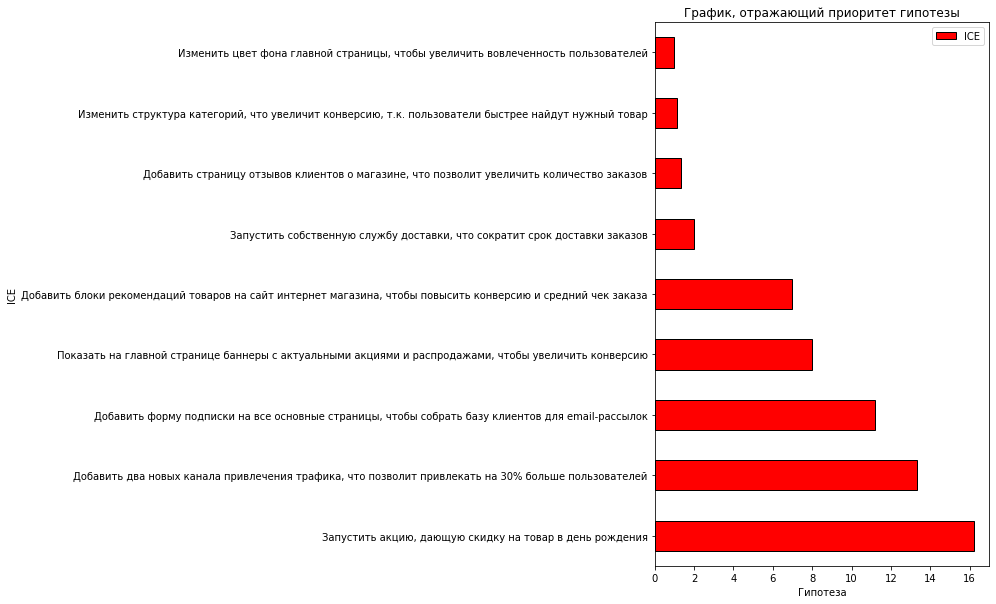

In [13]:
# Для наглядности построим  горизонтальную столбчатую диаграмму
barh_ice.plot(kind='barh', figsize=(6, 10), ec='black', color='r')

plt.title('График, отражающий приоритет гипотезы')
plt.xlabel('Гипотеза')
plt.ylabel('ICE')
plt.show()

### Применение фреймворка RICE для приоритизации гипотез

In [14]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
barh_rice = hypothesis[['hypothesis','RICE']].set_index('hypothesis').sort_values(by='RICE', ascending=False) # отсортируем по убыванию приоритета
barh_rice

,RICE
hypothesis,
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
"Запустить акцию, дающую скидку на товар в день рождения",16.2
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",9.6
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


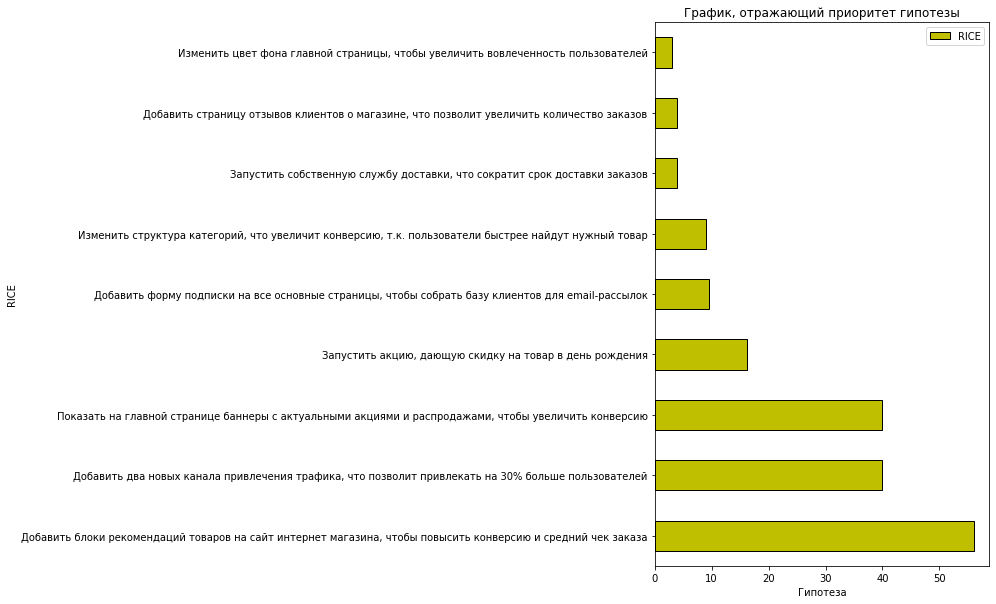

In [15]:
# Для наглядности построим  горизонтальную столбчатую диаграмму
barh_rice.plot(kind='barh', figsize=(6, 10), ec='black', color='y')

plt.title('График, отражающий приоритет гипотезы')
plt.xlabel('Гипотеза')
plt.ylabel('RICE')
plt.show()

### Изменение приоритизации гипотез при применении RICE вместо ICE

|Гипотеза| Приоритет гипотезы (ICE) | Приоритет гипотезы (RICE)|
|:----|:----|:----|
|Запустить акцию, дающую скидку на товар в день рождения|1|3|
|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей|2|2|
|Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок|3|4|
|Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию|4|2|
|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа|5|1|
|Запустить собственную службу доставки, что сократит срок доставки заказов|6|6| 
|Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов|7|6| 
|Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар|8|5| 
|Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей|9|7| 

**Вывод из сравнительного анализа:**

Исходя из таблицы приоритета гипотез параметр охвата Reach (скольких пользователей затронет изменение)  существенно меняет приоритетность гипотез, вычисленную по методу ICE.

- Без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach понизил приоритет этой акции до третьего места, что логично, поскольку охват её минимальный сравнению с другими гипотезами увеличения выручки (1 по дестятибалльной шкале)


- без изменений остались рейтинговые позиции гипотез о добавлении двух новых каналов привлечения трафика и запуске  собственной службе доставки


- Стали более приоритетными в RICE (по сравнению с ICE) гипотезы о добавлении блоков рекомендаций товаров на сайт интернет магазина и о показе на главной странице баннеров с актуальными акциями и распродажами

## Часть № 2. Анализ A/B-теста

### Изучение общей информации о данных для части 2 (Анализ A/B-теста) и предобработка данных

In [16]:
# Импортируем данные 
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [17]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

**Информация о датасете orders:**

- transactionId — идентификатор заказа;


- visitorId — идентификатор пользователя, совершившего заказ;


- date — дата, когда был совершён заказ;


- revenue — выручка заказа;


- group — группа A/B-теста, в которую попал заказ.


**Информация о датасете visitors:**


- date — дата;


- group — группа A/B-теста;


- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

**orders:**

In [18]:
# Посмотрим на общую информацию о датасете и сам датасет
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 37.5+ KB


In [19]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [20]:
# Для удобства приведем названия столбцов к нижнему регистру
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [21]:
# Подготовим список new_names с новыми именами для столбцов
new_names1 = ['transactionid', 'visitorid', 'date', 'revenue', 'group']

In [22]:
# Переименуем столбцы таблицы, которая хранится в переменной orders
orders.set_axis(new_names1, axis = 'columns', inplace = True)

In [23]:
#Проверим замену
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [24]:
print(orders['revenue'].min())
print(orders['revenue'].max())

50
1294500


In [25]:
#заменим тип данных переменной revenue
orders['revenue'] =orders['revenue'].astype('uint32')

In [26]:
#заменим тип данных переменной date
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [27]:
#проверим замену
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   uint32        
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1), uint32(1)
memory usage: 37.5+ KB


In [28]:
print('Начальная дата:', orders['date'].min())
print('Конечная дата:', orders['date'].max())


Начальная дата: 2019-08-01 00:00:00
Конечная дата: 2019-08-31 00:00:00


**visitors:**

In [29]:
# Посмотрим на общую информацию о датасете и сам датасет
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [30]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [31]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [32]:
# Заменим тип данных переменной visitors
visitors['visitors'] = visitors['visitors'].astype('uint16')

In [33]:
# Заменим тип данных переменной date
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [34]:
# Проверим замену
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     uint16        
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 932.0+ bytes


In [35]:
print('Начальная дата:', visitors['date'].min())
print('Конечная дата:', visitors['date'].max())

Начальная дата: 2019-08-01 00:00:00
Конечная дата: 2019-08-31 00:00:00


**Вывод:**
    
Таким образом, мы изучили два датасета,  изменили типы данных на более подходящие, проверили совпадение временных диапазонов (они действительно совпадают)

### Построение графика кумулятивной выручки по группам.

Прежде чем сторить график кумулятивной выручки по группам - оценим соответствие нашей выборки минимальному необходимому объёму выборки с помощью онлайн-калькулятора http://www.evanmiller.org/ab-testing/sample-size.html

Для начала расситаем начальную конверсию, полученную после изменения конверсию и относительное изменение конверсии после изменений:

In [36]:
initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum()*100
final_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()*100
print('Начальная конверсия: {:.2f} %'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.2f} %'.format(final_conversion))
print('Относительное изменение конверсии после изменений: {:.2f} %'.format(abs(1-(initial_conversion/final_conversion))*100))

Начальная конверсия: 2.97 %
Полученная после изменений конверсия: 3.38 %
Относительное изменение конверсии после изменений: 12.13 %


Введем начальную конверсию и полученное относительное изменение конверсии в калькулятор и получим минимальный необходимый размер выборки
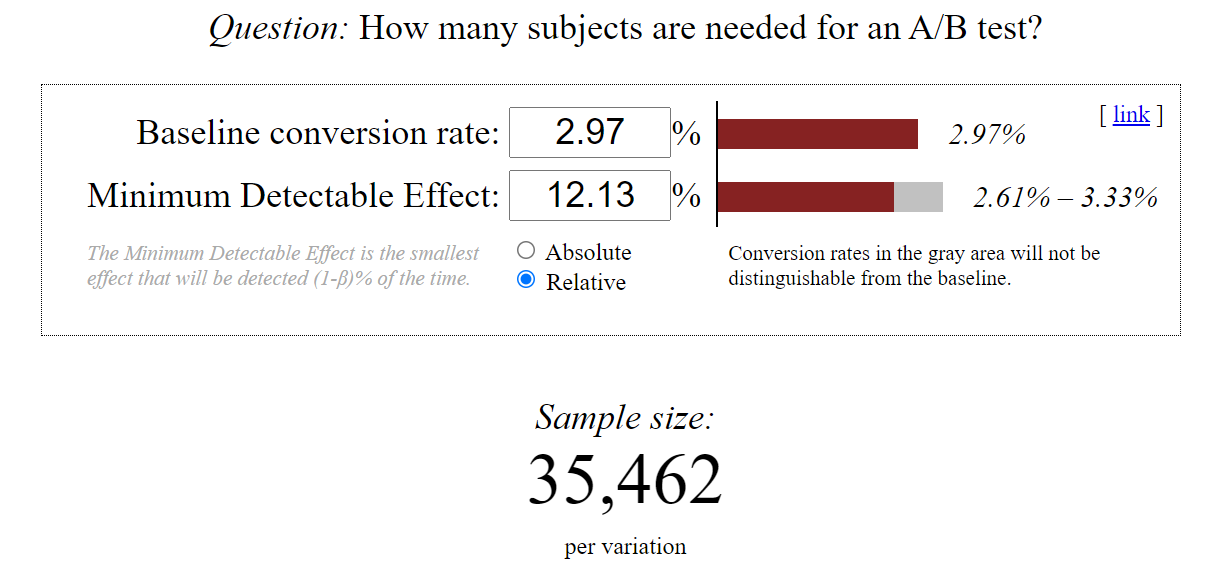

In [37]:
# Посмотрим на размер нашей выборки
visitors['visitors'].sum()

37652

Таким образом, необходимое количество значений выборки, равное 35462 наблюдениям, меньше нашей выборки (37652), а значит можно проводить эксперимент)

In [38]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


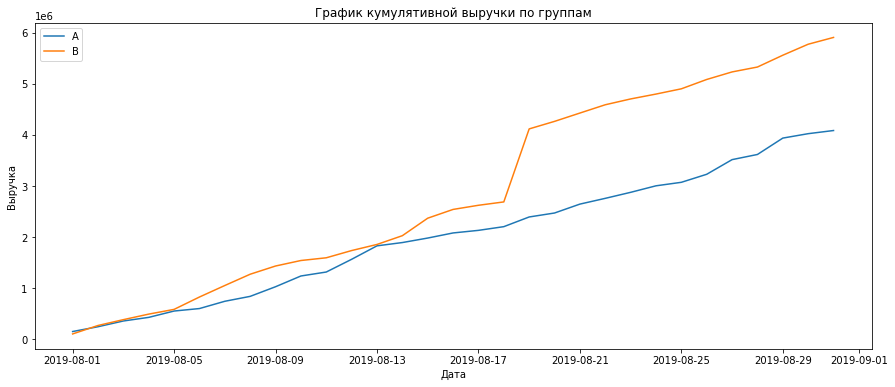

In [39]:
plt.figure(figsize =(15, 6))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста, однако есть точка, в которой  выручка группы B резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. В целом, график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A на протяжении всего периода. Можно сделать вывод, что группа B приносит большую прибыль, нежели группа A.

### Построение графика кумулятивного среднего чека по группам

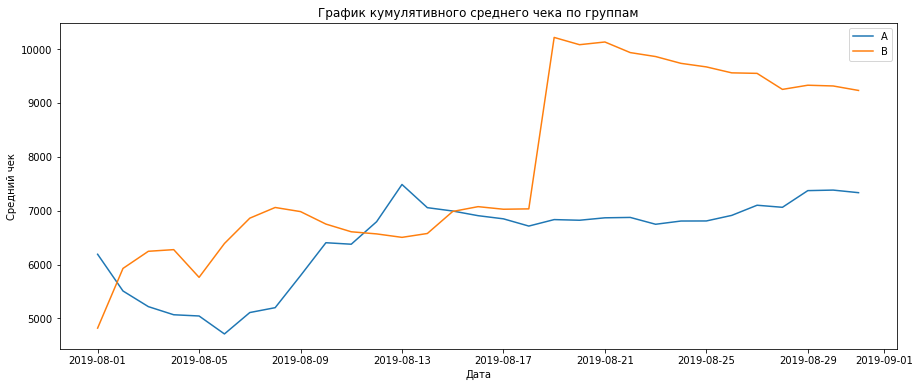

In [40]:
plt.figure(figsize =(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

Средний чек становится равномерным ближе к концу теста. Cредний чек в группе B тоже почти на протяжении всего временного отрезка был выше, чем средний чек в группе А, однако стоит заострить внимание на резком колебании во второй половине графика - возможно, этот скачок обусловлен аномалиями.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

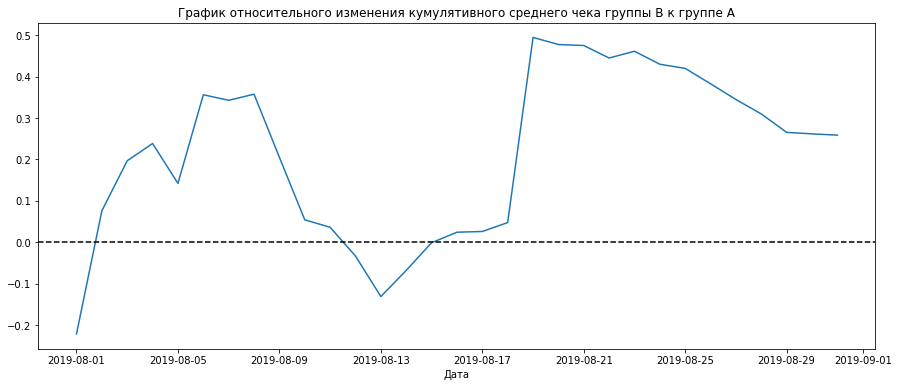

In [41]:
plt.figure(figsize =(15, 6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Либо это сигнализирует о наличии слишком крупных заказов, либо о наличии выбросов. Необходимо будет проверить данные на наличие аномалий.

### Построение графика кумулятивной конверсии по группам

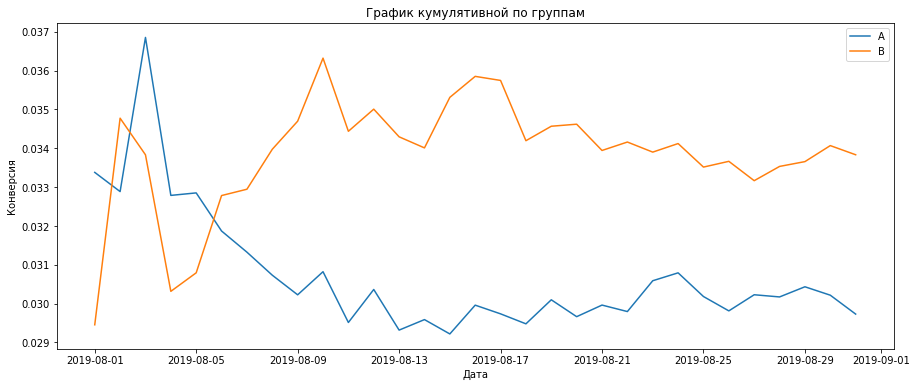

In [42]:
plt.figure(figsize =(15, 6))
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()



Мы получили относительно симметричный график. Группы колебались около одного значения, но затем конверсия группы A вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась. Опять же группа В приоритетнее.

### График относительного изменения кумулятивной конверсии группы B к группе A

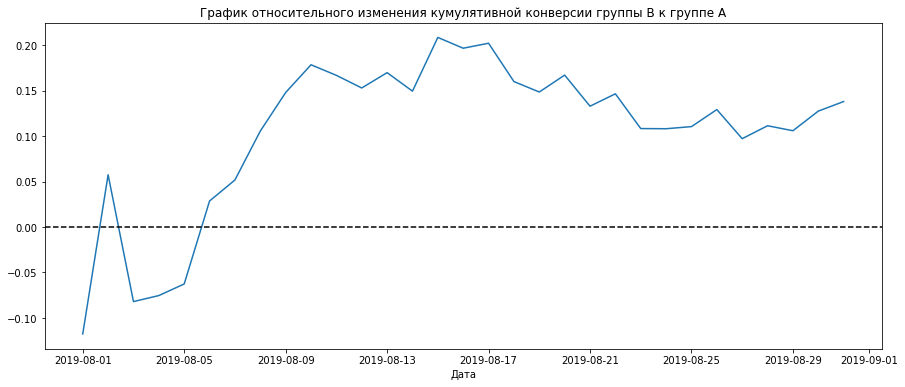

In [43]:
plt.figure(figsize =(15, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()


Несмотря на то, что в начале теста группа B значительно проигрывала группе A, ее конверсия стабильно лучше конверсии в группе A, это заметно спустя неделю от начала теста.

### Построение точечного графика количества заказов по пользователям

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


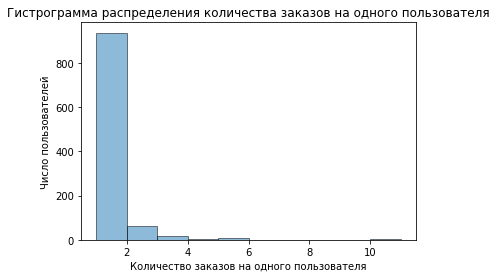

In [44]:
# Построим гистограмму распределения количества заказов на одного пользователя
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 
plt.hist(ordersByUsers['orders'], alpha = 0.5, ec='black') 
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов на одного пользователя')
plt.ylabel('Число пользователей')
plt.show()



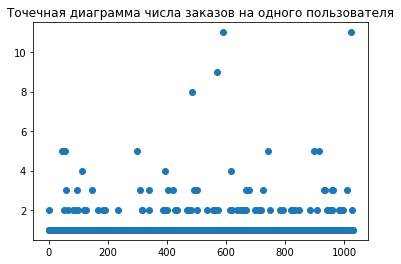

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

Большая часть клиентов совершают по одному - двум заказам, однако есть и те, кто заказывают существенно больше

### Рассчет 95-й и 99-й перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [46]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


Не более 5% пользователей оформляли заказы больше чем 2 раза и только 1% пользователей заказывал более четырех раз.

### Построение точечного графика стоимостей заказов

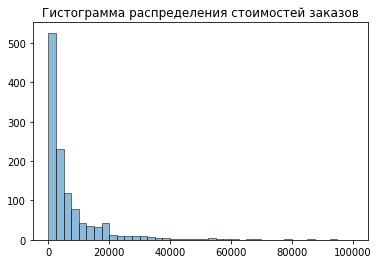

In [47]:
plt.hist(orders['revenue'],bins = 40, range=(0,100000),alpha = 0.5, ec='black')
plt.title('Гистограмма распределения стоимостей заказов')
plt.show()

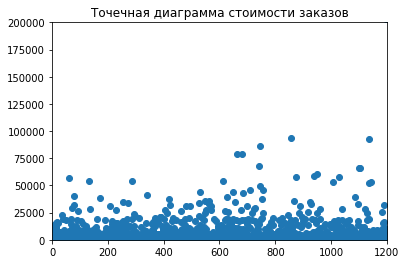

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма стоимости заказов')
plt.axis([0, 1200, 0, 200000]) 
plt.show()

Исходя из графика, большая часть пользователей совершает покупки стоимостью не более 25000-30000 у.е. 

### Рассчет 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.

In [49]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000
99: 58233


Не более 5% заказов дороже 28000 у.е и не более 1% дороже 58233 у.е

### Рассчет статистической значимости различий в конверсии между группами по «сырым» данным

In [50]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'visitorid', 'transactionid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5).T) 

,0,1,2,3,4
date,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00
ordersPerDateA,20,19,24,15,25
revenuePerDateA,148579,93822,112473,70825,124218
ordersPerDateB,21,24,16,17,23
revenuePerDateB,101217,165531,114248,108571,92428
ordersCummulativeA,20,39,63,78,103
revenueCummulativeA,148579,242401,354874,425699,549917
ordersCummulativeB,21,45,61,78,101
revenueCummulativeB,101217,266748,380996,489567,581995
visitorsPerDateA,719,619,507,717,756


Где:

- ordersPerDateA — количество заказов в выбранную дату в группе A;


- revenuePerDateA — суммарная выручка в выбранную дату в группе A;


- ordersPerDateB — количество заказов в выбранную дату в группе B;


- revenuePerDateB — суммарная выручка в выбранную дату в группе B;


- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;


- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;


- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;


- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;


- visitorsPerDateA — количество пользователей в выбранную дату в группе A;  


- visitorsPerDateB — количество пользователей в выбранную дату в группе B;


- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;


- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Для сравнения различий в конверсии между группами по «сырым» данным мы будем использовать непараметрический тест Уилкоксона-Манна-Уитни, которой используется в случае, когда мы имеем дело не с нормально распределенными выборками.

**Нулевая гипотеза H0:**

По "сырым" данным статистически значимых различий в конверсиях групп А и B нет

**Альтернативная гипотеза H0:**

По "сырым" данным в конверсии групп A и B разница статистически значима


При заданных гипотезах критерий является двусторонным (нулевая гипотеза означает равенство значений, а альтернативная - неравенство), поэтому мы зададим дополнительный параметр alternative='two-sided' и возьмем критический уровень значимости, равый 5 %:

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
print()
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB,alternative='two-sided')
print('P-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима')
else:
    print('По неочищенным данным различий  в конверсии групп A и B нет')
    

Относительный прирост конверсии группы B по отношению к группе A: 0.138

P-value: 0.016792355056752608

По неочищенным данным в конверсии групп A и B разница статистически значима


### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза H0:**

По "сырым" данным статистически значимых различий в средних чеках групп А и B нет

**Альтернативная гипотеза H0:**

По "сырым" данным в средних чеках групп A и B разница статистически значима

In [52]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')
print()
print('P-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('По неочищенным данным разница в средних чеках в группах A и B статистически значима')
    
else:
    print('По неочищенным данным различий в средних чеках в группах A и B нет')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259

P-value: 0.7292909855432458

По неочищенным данным различий в средних чеках в группах A и B нет


### Рассчет статистической значимости различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28000 у.е. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей методом shape():

In [53]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64

(74,)


Количество аномальных пользователей - 74.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [54]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

**Нулевая гипотеза H0:**

По "очищенным" данным статистически значимых различий в конверсиях групп А и B нет

**Альтернативная гипотеза H0:**

По "очищенным" данным в конверсии групп A и B разница статистически значима

In [55]:
print('Относительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print()
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')
print('P-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B разница статистически значима')
else:
    print('По очищенным данным различий в конверсии групп нет')

Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173

P-value: 0.013042592743036758

По очищенным данным в конверсии групп A и B разница статистически значима


Результаты по конверсии практически не изменились.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

**Нулевая гипотеза H0:**

По "сырым" данным статистически значимых различий в средних чеках групп А и B нет

**Альтернативная гипотеза H0:**

По "сырым" данным в средних чеках групп A и B разница статистически значима

In [56]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))
print()
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],alternative='two-sided')
print('P-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('По очищенным данным разница в средних чеках в группах A и B статистически значима')
else:
    print('По очищенным данным различий в средних чеках в группах A и B нет')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020

P-value: 0.738481751314565

По очищенным данным различий в средних чеках в группах A и B нет


## Итоговый вывод

### Часть №1. Приоритизация гипотез

Исходя из таблицы приоритета гипотез параметр охвата Reach (скольких пользователей затронет изменение) существенно меняет приоритетность гипотез, вычисленную по методу ICE.

- Без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach понизил приоритет этой акции до третьего места, что логично, поскольку охват её минимальный сравнению с другими гипотезами увеличения выручки (1 по дестятибалльной шкале)


- без изменений остались рейтинговые позиции гипотез о добавлении двух новых каналов привлечения трафика и запуске собственной службе доставки


- Стали более приоритетными в RICE (по сравнению с ICE) гипотезы о добавлении блоков рекомендаций товаров на сайт интернет магазина и о показе на главной странице баннеров с актуальными акциями и распродажами

 На мой взгляд, параметр Reach очень важен, так как он учитывает охват изменений, а  это важная составляющая оценки гипотез

### Часть № 2. Анализ A/B-теста

**Варианты решений:**

- Остановить тест, зафиксировать победу одной из групп.


- Остановить тест, зафиксировать отсутствие различий между группами.


- Продолжить тест.

Начнем с того, что мы подтвердили корректность проведения самого A/B - теста, оценив соответствие нашей выборки минимальному необходимому объёму выборки - проблему подглядывания в результате сравнения групп во время проведения теста можно исключить.

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. Но были сомнения относительно лидерства этой группы, связанные с резкими колебаниями на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Действительно, на "очищенных" данных разница между средними чеками стала минимальна, однако тест все равно стоит остановить и зафиксировать победу группы B, поскольку показатель конверсии в группе B больше показателя в группе A (на 14% до и на 17% после очистки данных) и данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой.